# Boston House Prices

## Introduction



## Background

Python Libraries import:

In [1]:
# Import of all the python libraries required for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as kr
import sklearn.model_selection as mod
from matplotlib import rcParams


Using TensorFlow backend.


In [2]:
# import and preparation of the Boston house price dataset for analysis
# adapted from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
# and adapted from https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

from sklearn.datasets import load_boston
bostonds = load_boston()  #bostonds is a dictionary
# print(bostonds.data.shape)
# print(bostonds.keys())
# print(bostonds.feature_names)
# print(bostonds.DESCR)
# print(bostonds.data)

# Convert to a pandas dataframe
boston = pd.DataFrame(bostonds.data)
# Add the feature_names from the bostonds dictionary as columns
boston.columns = bostonds.feature_names
# Add the target attribute, the price, from the dictionary to the dataframe
boston['PRICE'] = bostonds.target
# show summary data and first few lines of dataset
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [5]:
#df.corr

In [6]:
boston.iloc[0,:]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
PRICE       24.00000
Name: 0, dtype: float64

In [171]:
m = kr.models.Sequential()
m.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
m.add(kr.layers.Dense(units=300, activation='sigmoid'))
#m.add(kr.layers.Dense(units=100, activation='linear'))
#m.add(kr.layers.Dense(units=100, activation='sigmoid'))
#m.add(kr.layers.Dense(units=1000, activation='tanh'))
#m.add(kr.layers.Dense(units=1000, activation='tanh'))
m.add(kr.layers.Dense(units=300, activation='linear'))
m.add(kr.layers.Dense(units=300, activation='sigmoid'))
m.add(kr.layers.Dense(units=10, activation='linear' ))
m.add(kr.layers.Dense(units=1, activation='linear'))

# Add a three neuron output layer.
#m.add(kr.layers.Dense(units=1, activation='linear'))

# Build the graph.
m.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

### Build Keras Model

In [172]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 100 neurons and an input layer with 13 .
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))

model.add(kr.layers.Dense(units=100, activation='linear', input_dim=5))
model.add(kr.layers.Dense(units=100, activation='linear'))
model.add(kr.layers.Dense(units=100, activation='sigmoid'))
model.add(kr.layers.Dense(units=100, activation='linear' ))
#model.add(kr.layers.Dense(units=1, activation='linear'))

# Add a three neuron output layer.
model.add(kr.layers.Dense(units=1, activation='linear'))

# Build the graph.
model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=['accuracy'])

In [173]:
boston.iloc[0,:]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
PRICE       24.00000
Name: 0, dtype: float64

In [174]:
inputs = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
#inputs = boston[['CRIM','NOX','ZN','PTRATIO','LSTAT']]

In [175]:
outputs = boston['PRICE']
outputs

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [176]:


# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.8)
#inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.8)



In [177]:
m.fit(inputs_train, outputs_train, epochs=10, batch_size=15)

Epoch 1/10
101/101 [==============================] - 8s 81ms/step - loss: nan - acc: 0.0000e+00
Epoch 2/10
101/101 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 3/10
101/101 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 4/10
101/101 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 5/10
101/101 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 6/10
101/101 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 7/10
101/101 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 8/10
101/101 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 9/10
101/101 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 10/10
101/101 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00


### Train

In [14]:
# Train the neural network.
#model.fit(inputs_train, outputs_train, epochs=15, batch_size=10)
#model.fit(inputs_train, outputs_train, epochs=15, batch_size=10) loss 72
#model.fit(inputs_train, outputs_train, epochs=32, batch_size=10)

#### Plot

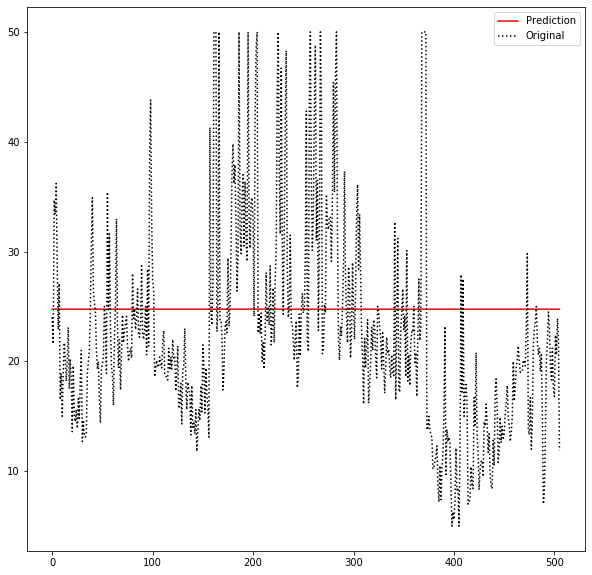

In [170]:

plt.rcParams['figure.figsize'] = (10, 10)
# all values through the model
#p = model.predict(inputs)
p = m.predict(inputs)
# Plot the values.

plt.plot(p, 'r-', label='Prediction')
plt.plot(outputs, 'k:', label='Original')
plt.legend()

In [16]:
References

https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air',

This course
Books
Deep Learning with Python Jason Brownlee
Deep Learning Tutorial Steve Nouri
https://keras.io keras documentation


SyntaxError: invalid syntax (<ipython-input-16-c3ff5f7f2832>, line 3)